In [1]:
from keras.applications.vgg16 import VGG16

In [3]:
model = VGG16()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [4]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
from keras.utils import plot_model

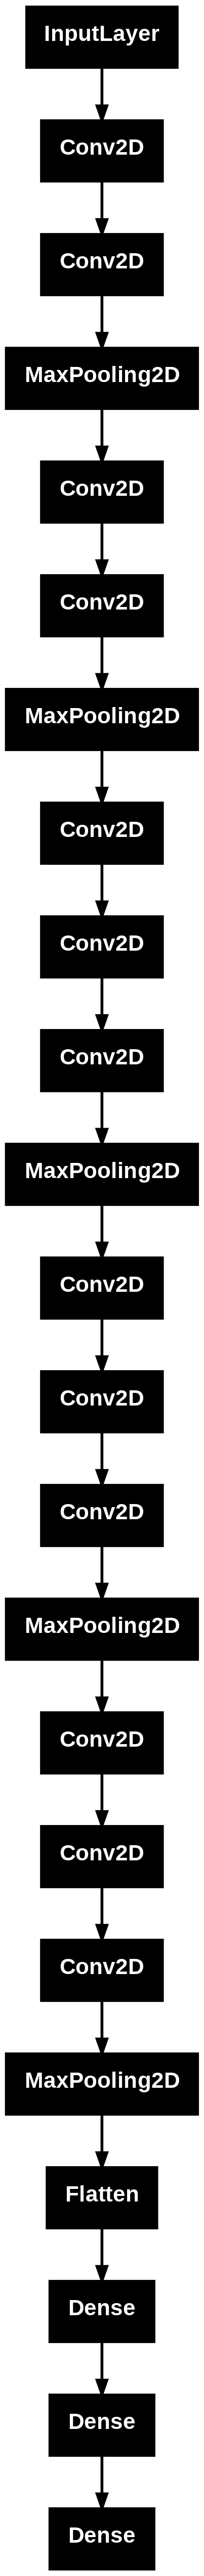

In [7]:
plot_model(model)

In [9]:
for i in range(len(model.layers)):
  # check for convoultional layers
  if "conv" not in  model.layers[i].name:
    continue
  # get filters weights
  filters,baises = model.layers[i].get_weights()
  print(i,model.layers[i].name,filters.shape)


1 block1_conv1 (3, 3, 3, 64)
2 block1_conv2 (3, 3, 64, 64)
4 block2_conv1 (3, 3, 64, 128)
5 block2_conv2 (3, 3, 128, 128)
7 block3_conv1 (3, 3, 128, 256)
8 block3_conv2 (3, 3, 256, 256)
9 block3_conv3 (3, 3, 256, 256)
11 block4_conv1 (3, 3, 256, 512)
12 block4_conv2 (3, 3, 512, 512)
13 block4_conv3 (3, 3, 512, 512)
15 block5_conv1 (3, 3, 512, 512)
16 block5_conv2 (3, 3, 512, 512)
17 block5_conv3 (3, 3, 512, 512)


In [13]:
# retrive weihghts
filters , bais = model.layers[1].get_weights()

In [14]:
#  normilze the filter tp 0 to 1
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

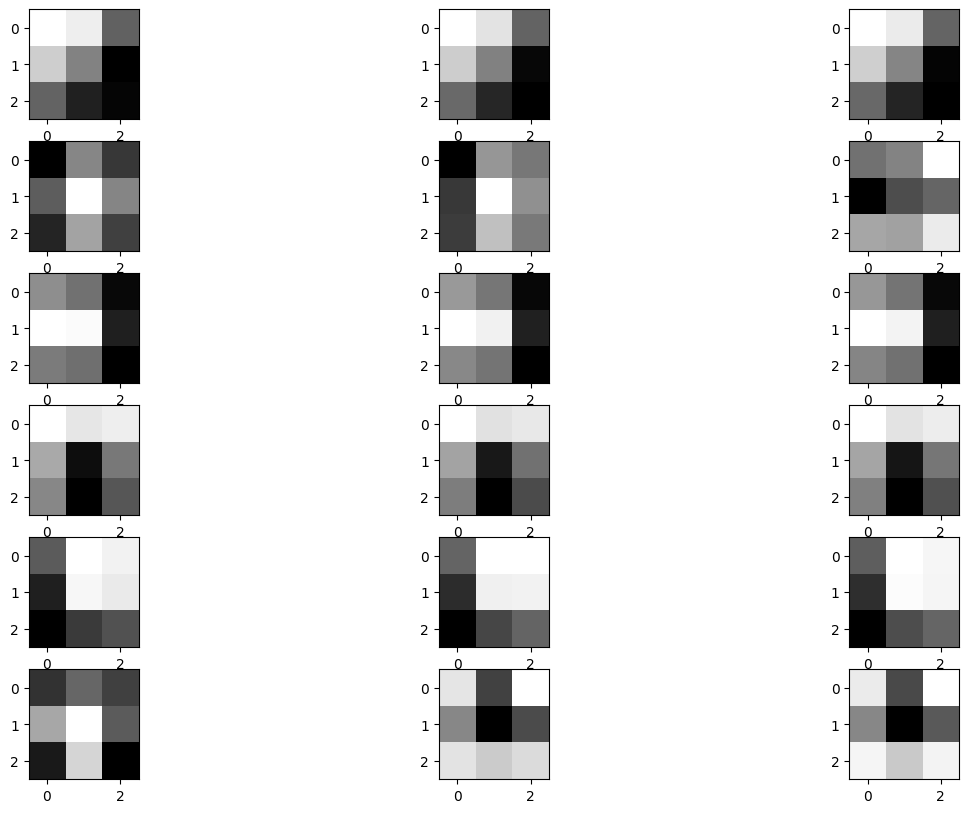

In [31]:
import matplotlib.pyplot as pyplot
n_filters =6
ix =1
fig = pyplot.figure(figsize = (15,10))
for i  in range (n_filters):
  # get filters
   f = filters[:,:,:,i]
   for j in range(3):
    # subplot for 6 filters and 3 channels
    pyplot.subplot(n_filters,3,ix)
    pyplot.imshow(f[:,:,j],cmap= "grey" )
    ix +=1
pyplot.show()



In [39]:
from keras.models import Model
model1 = Model(inputs = model.inputs , outputs = model.layers[1].output)

In [52]:
from keras.utils import load_img, img_to_array
image = load_img("/content/smiling-virat-kohli-hd-ghdrwtslv52wozhv.jpg",target_size = (224,224))

In [53]:
# covert image to array
image = img_to_array(image)

In [54]:
from tensorflow import expand_dims
from keras.applications.vgg16 import preprocess_input
 #expand dimensions so that it represents a single 'sample'
image = expand_dims(image, axis=0)

image = preprocess_input(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


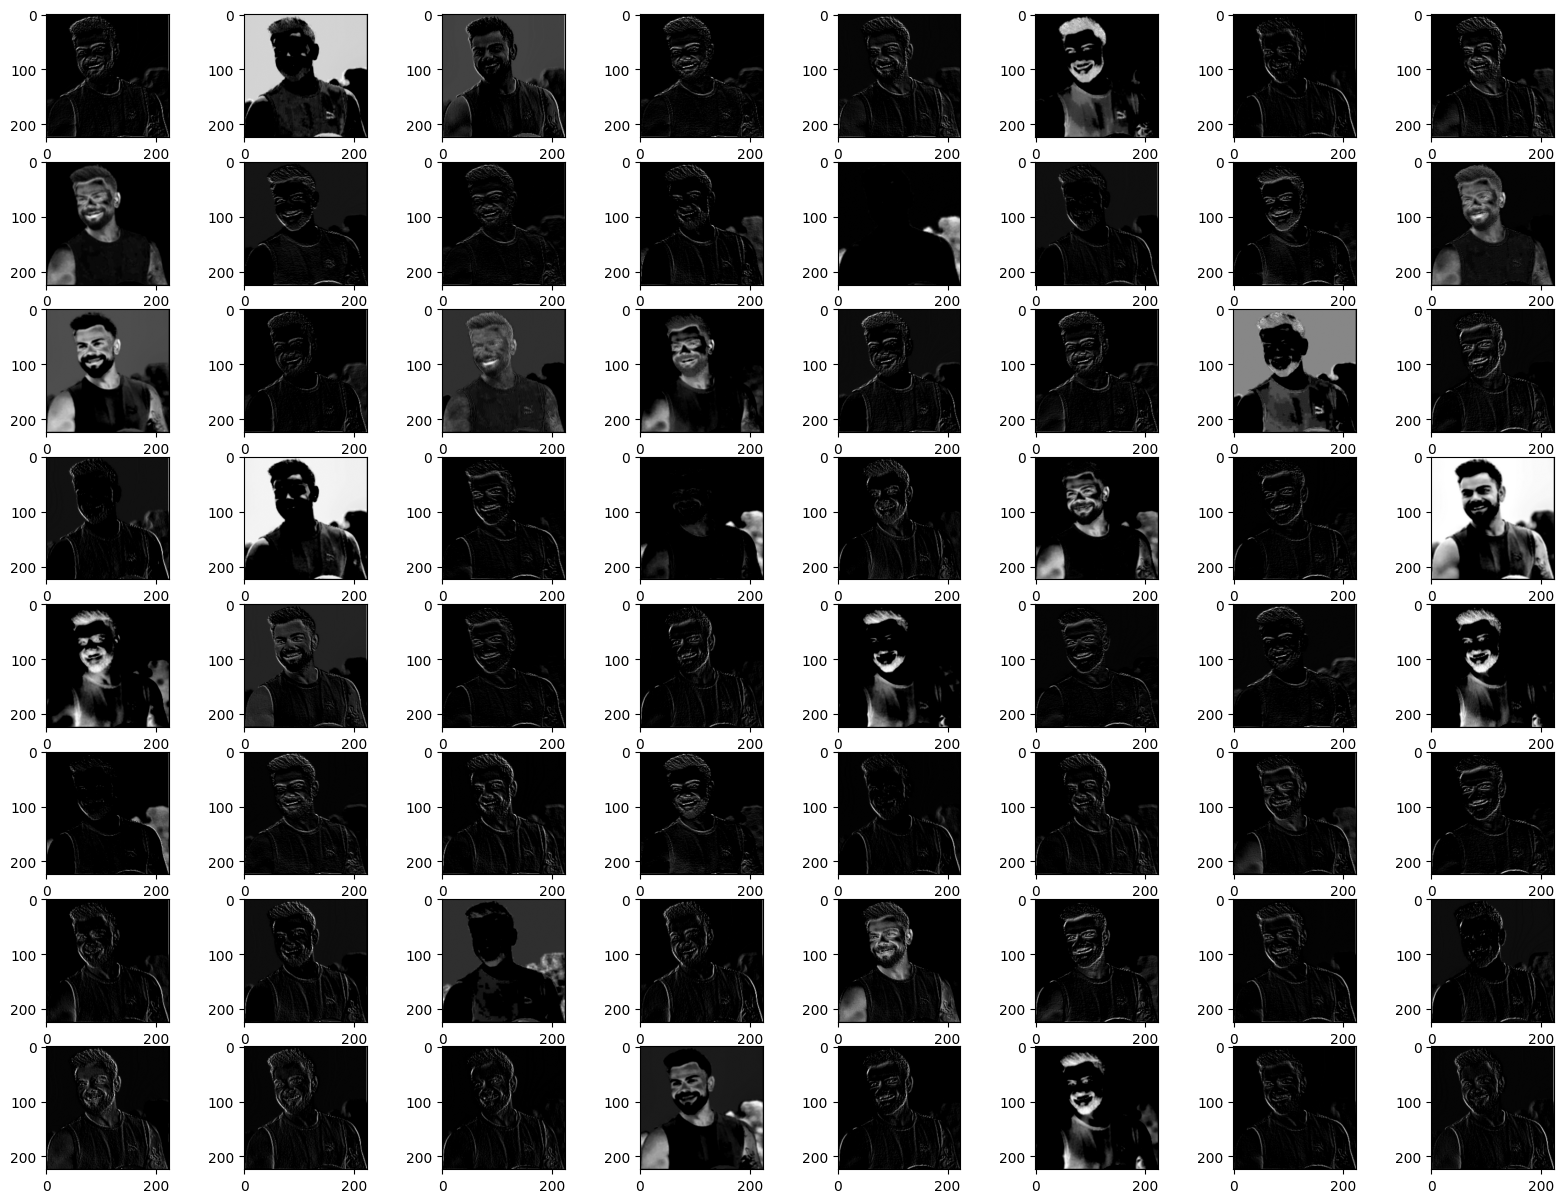

In [55]:
features = model1.predict(image)

fig = pyplot.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):

    pyplot.subplot(8,8,i)
    pyplot.imshow(features[0,:,:,i-1] , cmap='gray')

pyplot.show()